In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')

In [7]:
train = pd.read_csv("twitter_training.csv", header=None)
val = pd.read_csv("twitter_validation.csv",header=None)

In [8]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
val.columns = ['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
train_data = train
val_data = val

In [11]:
#Tratando os dados colocando todos em minusculo, convertendo numeros
#E removendo caracteres especiais e emojis
train_data["lower"] = train_data.text.str.lower()
train_data["lower"] = [str(data) for data in train_data.lower]
train_data["lower"] = train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex


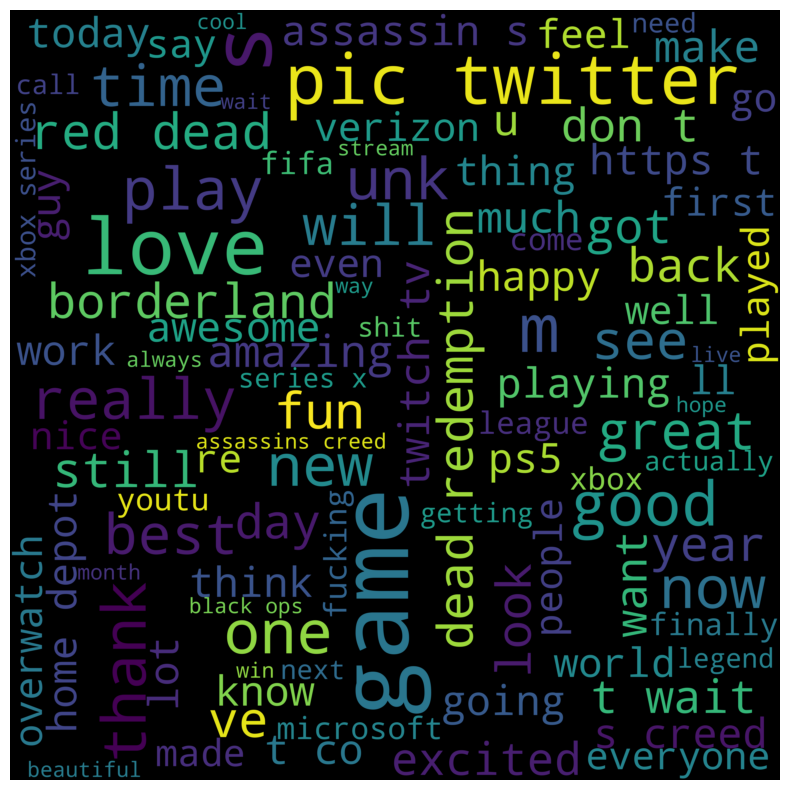

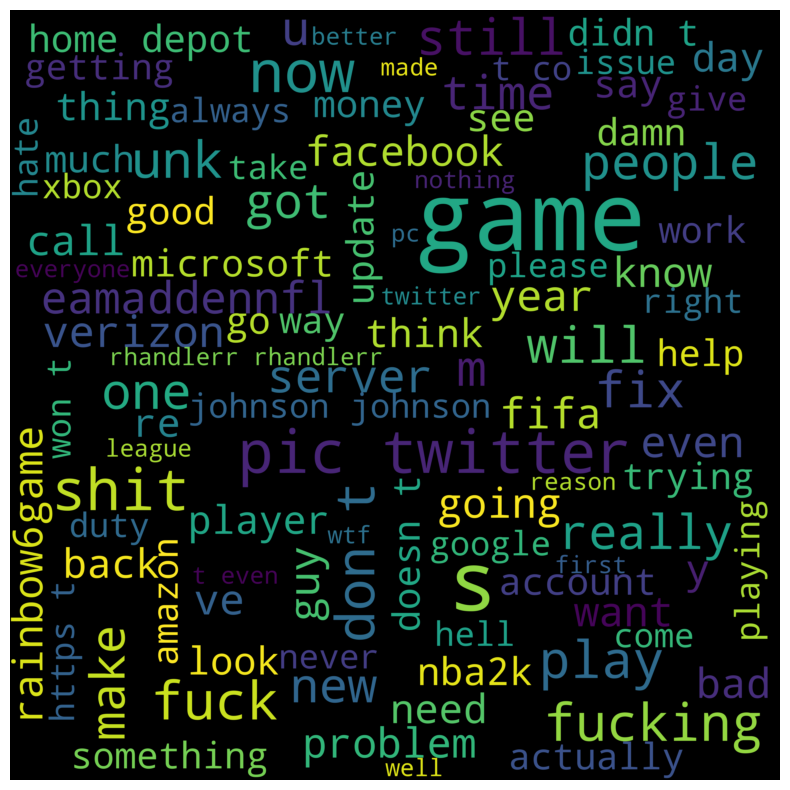

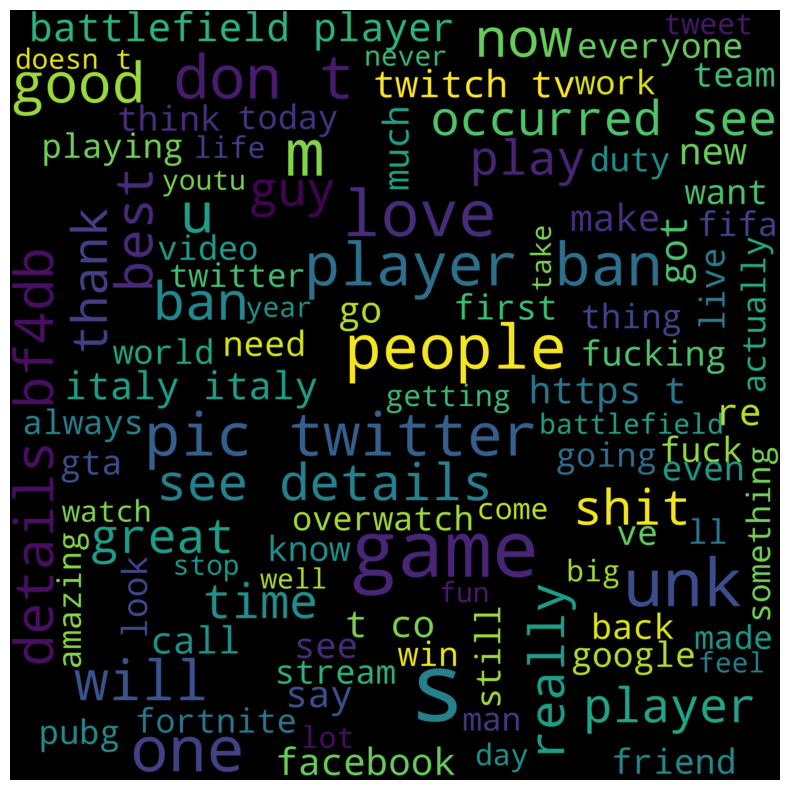

In [12]:
#Criação de uma WordCloud para visualizar as palavras mais comuns em mensagens positivas

word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
#Text splitting
tokens_text = [word_tokenize(str(word).lower()) for word in train_data['lower']]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Numero de tokens: ", len(set(tokens_counter)))


Numero de tokens:  30436


In [14]:
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [15]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

C:\Users\gusta\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

In [16]:
model = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)


Accuracy:  90.79467095132891


In [17]:

test_pred

array(['Negative', 'Neutral', 'Neutral', ..., 'Negative', 'Neutral',
       'Irrelevant'], dtype=object)

In [18]:

# Application of the Logistic Regression model to validation data.
y_val_bow = val_data['type']
Val_pred = model.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred) * 100)

Accuracy:  98.6


In [19]:
match = pd.DataFrame()

# df[Match] = df[y_val_bow] == df[Val_pred]

In [20]:
match = y_val_bow == Val_pred

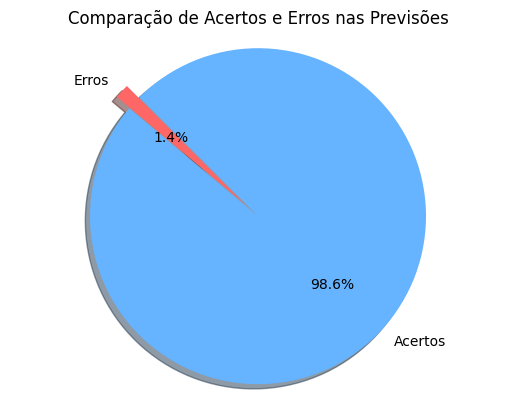

In [21]:
results = match.value_counts()
acertos = results[True] if True in results else 0
erros = results[False] if False in results else 0


labels = ['Acertos', 'Erros']
sizes = [acertos, erros]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Comparação de Acertos e Erros nas Previsões')
plt.show()

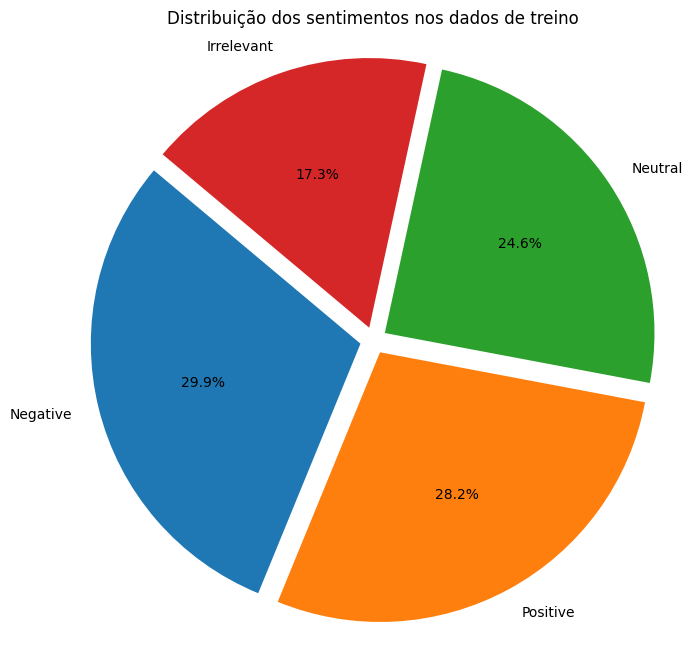

In [31]:
# Calcular a distribuição de valores em y_test_bow
distribution = y_test_bow.value_counts() / y_test_bow.shape[0]

explode = (0.05, 0.05,0.05,0.05 )
# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(distribution, explode=explode, labels=distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos sentimentos nos dados de treino')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()